In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
city_df.head()


ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()
# Combine the data into a single dataset

# Display the data table for preview


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
# Read the City and Ride Data
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
combined_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

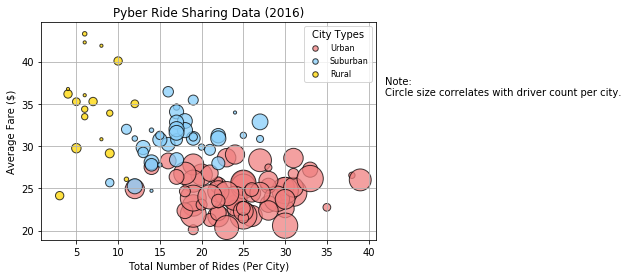

In [4]:
# Obtain the x and y coordinates for each of the three city types
# urban
urban_data = combined_df.loc[combined_df["type"] == "Urban", :]
urban_citylist = urban_data["city"].unique()
urban_group = urban_data.groupby(["city"])
urban_avg = urban_group.mean()
urban_count = urban_group.count()
urban_avgfarelist = [urban_avg.loc[x, "fare"] for x in urban_citylist]
urban_ridecountlist = [urban_count.loc[x, "ride_id"] for x in urban_citylist]
urban_drivercountlist = [urban_avg.loc[x, "driver_count"] for x in urban_citylist]
urban_size = [x * 10 for x in urban_drivercountlist]
urban_summary = {"City": urban_citylist,
                       "Average Fare $": urban_avgfarelist,
                       "Total Number of Rides": urban_ridecountlist,
                       "Drivers Per City": urban_drivercountlist
                }
urban_df = pd.DataFrame(urban_summary)

# suburban

suburban_data = combined_df.loc[combined_df["type"] == "Suburban", :]
suburban_citylist = suburban_data["city"].unique()
suburban_group = suburban_data.groupby(["city"])
suburban_avg = suburban_group.mean()
suburban_count = suburban_group.count()
suburban_avgfarelist = [suburban_avg.loc[x, "fare"] for x in suburban_citylist]
suburban_ridecountlist = [suburban_count.loc[x, "ride_id"] for x in suburban_citylist]
suburban_drivercountlist = [suburban_avg.loc[x, "driver_count"] for x in suburban_citylist]
suburban_size = [x * 10 for x in suburban_drivercountlist]
suburban_summary = {"City": suburban_citylist,
                       "Average Fare $": suburban_avgfarelist,
                       "Total Number of Rides": suburban_ridecountlist,
                       "Drivers Per City": suburban_drivercountlist
                }
suburban_df = pd.DataFrame(suburban_summary)

# rural

rural_data = combined_df.loc[combined_df["type"] == "Rural", :]
rural_citylist = rural_data["city"].unique()
rural_group = rural_data.groupby(["city"])
rural_avg = rural_group.mean()
rural_count = rural_group.count()
rural_avgfarelist = [rural_avg.loc[x, "fare"] for x in rural_citylist]
rural_ridecountlist = [rural_count.loc[x, "ride_id"] for x in rural_citylist]
rural_drivercountlist = [rural_avg.loc[x, "driver_count"] for x in rural_citylist]
rural_size = [x * 10 for x in rural_drivercountlist]
rural_summary = {"City": rural_citylist,
                       "Average Fare $": rural_avgfarelist,
                       "Total Number of Rides": rural_ridecountlist,
                       "Drivers Per City": rural_drivercountlist
                }
rural_df = pd.DataFrame(rural_summary)

# Build the scatter plots for each city types

plt.scatter(urban_ridecountlist, urban_avgfarelist, marker="o", color="#f08080", edgecolors="black", s=urban_size, alpha=.75, label="Urban")
plt.scatter(suburban_ridecountlist, suburban_avgfarelist, marker="o", color="#87cefa", edgecolors="black", s=suburban_size, alpha=.75, label="Suburban")
plt.scatter(rural_ridecountlist, rural_avgfarelist, marker="o", color="#FFD700", edgecolors="black", s=rural_size, alpha=.75, label="Rural")


# # Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
# plt.legend(loc="upper right", title="City Types", markerscale=2, fontsize=7) had wonky sizing, so found a hack
lgnd = plt.legend(loc="upper right", title="City Types", scatterpoints=1, fontsize=8)
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    
# Incorporate a text label regarding circle size
plt.text(42, 36, 'Note: \nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig("pyber_bubble.png", bbox_inches="tight")
plt.show()

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

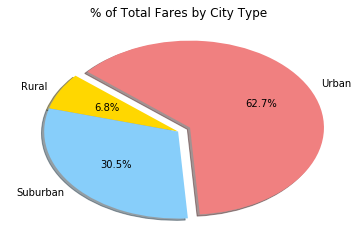

In [6]:
# # Calculate Type Percents

type_group = combined_df.groupby(["type"])

type_sum = type_group.sum()
type_sum.head()


urbanfares = type_sum.loc["Urban", "fare"]
suburbanfares = type_sum.loc["Suburban", "fare"]
ruralfares = type_sum.loc["Rural", "fare"]


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural",  "Suburban", "Urban",]

# The values of each section of the pie chart
sizes = [ ruralfares, suburbanfares, urbanfares]

# The colors of each section of the pie chart
colors = [  "#FFD700", "#87cefa", "#f08080",]
explode = (0, 0, .1)
plt.title("% of Total Fares by City Type")
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure

plt.savefig("pyber_faresbycitytypepie.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

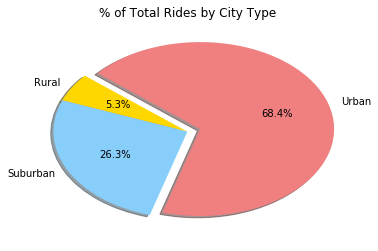

In [8]:
# # Calculate Type Percents
records_count = combined_df.count()
totalrecords = records_count["city"]

type_group = combined_df.groupby(["type"])

type_count = type_group.count()
typelist = type_group["city"].count()

urbantotal = type_count.loc["Urban", "city"]
suburbantotal = type_count.loc["Suburban", "city"]
ruraltotal = type_count.loc["Rural", "city"]

urbanpercent = urbantotal/totalrecords
suburbanpercent = suburbantotal/totalrecords
ruralpercent = ruraltotal/totalrecords


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural",  "Suburban", "Urban",]

# The values of each section of the pie chart
sizes = [ ruralpercent, suburbanpercent, urbanpercent]

# The colors of each section of the pie chart
colors = [  "#FFD700", "#87cefa", "#f08080",]

explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("pyber_ridesbycitytypepie.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

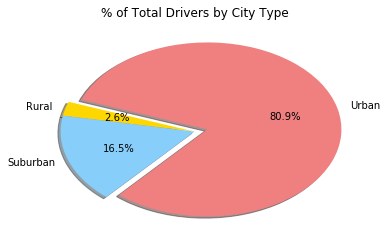

In [24]:
# Calculate Driver Percents


ruraldrivers = sum(rural_drivercountlist)
suburbandrivers = sum(suburban_drivercountlist)
urbandrivers = sum(urban_drivercountlist)


# # Build Pie Charts

# Labels for the sections of our pie chart
labels = ["Rural",  "Suburban", "Urban",]

# The values of each section of the pie chart
sizes = [ ruraldrivers, suburbandrivers, urbandrivers]

# The colors of each section of the pie chart
colors = [  "#FFD700", "#87cefa", "#f08080",]
explode = (0, 0, .1)
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)


# Save Figure
plt.savefig("pyber_driversbycitytypepie.png")

In [25]:
# Show Figure
plt.show()